In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import community

In [34]:
#G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
g = nx.read_weighted_edgelist("../csv/edges_networkx.csv", delimiter=',', create_using = nx.Graph(), nodetype = int)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 2099
Number of edges: 21887
Average degree:  20.8547


In [35]:
nodes=pd.read_csv('../csv/nodes.csv')
old_nodes_df=nodes[nodes.PY<=2006]
new_nodes=nodes[nodes.PY>2006].index.values
g.remove_nodes_from(new_nodes)
print nx.info(g)

Name: 
Type: Graph
Number of nodes: 941
Number of edges: 5430
Average degree:  11.5409


Name: 
Type: Graph
Number of nodes: 931
Number of edges: 5430
Average degree:  11.6649
29


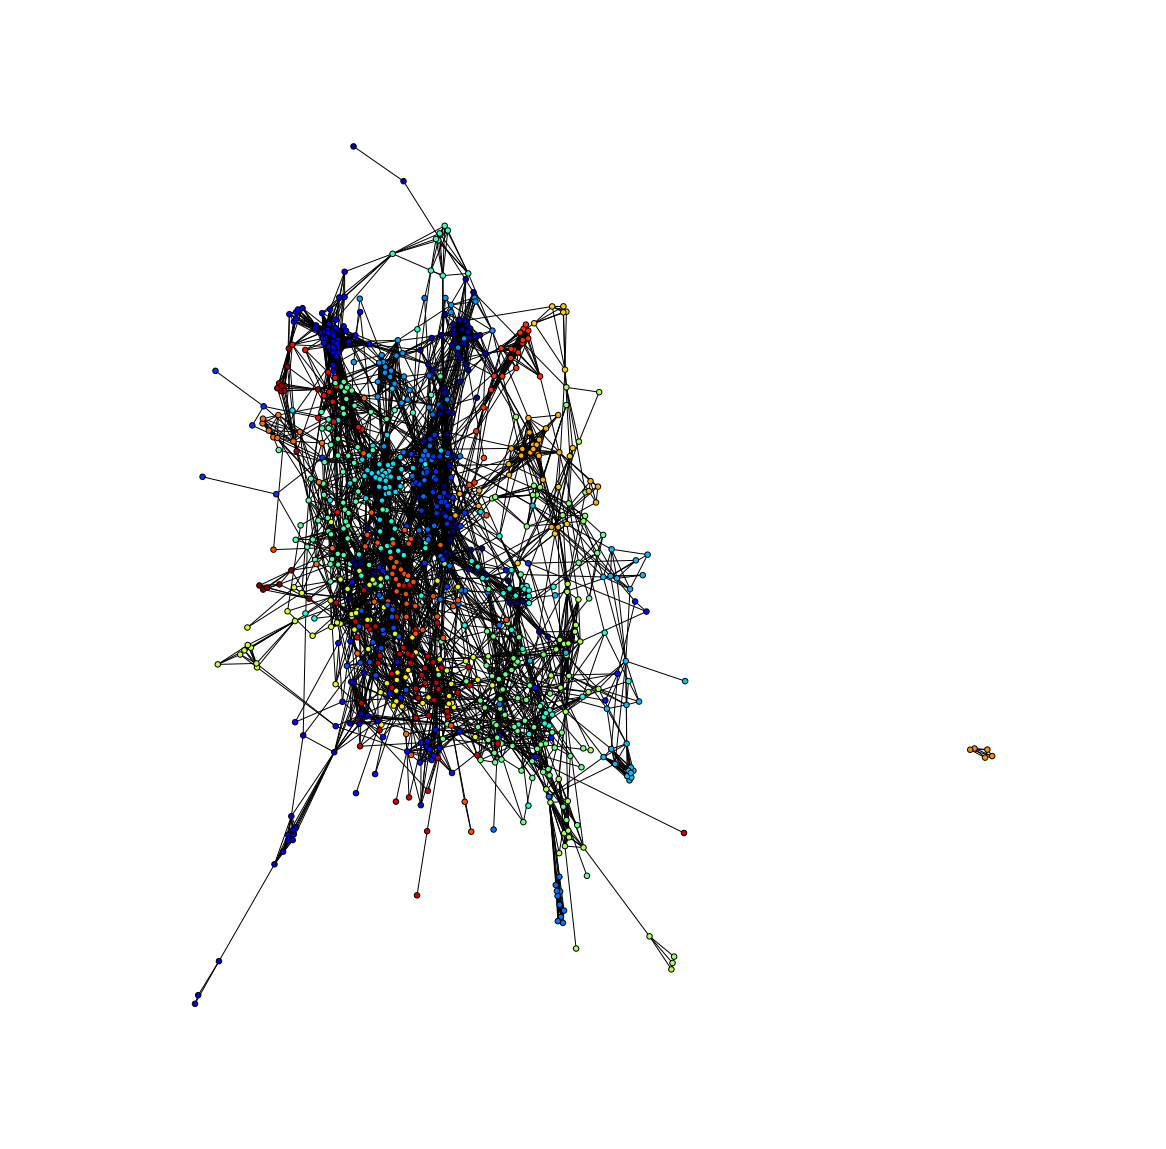

In [36]:
def cluster(g):
    deg = g.degree()
    to_remove = [n for n in deg if deg[n] == 0]
    g.remove_nodes_from(to_remove)
    print nx.info(g)
    spring_pos = nx.spring_layout(g)
    parts = community.best_partition(g)
    community.modularity(parts,g)
    values = [parts.get(node) for node in g.nodes()]
    print max(values)
    plt.figure(figsize=(20,20))
    plt.axis("off")
    nx.draw_networkx(g, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 30, with_labels = False)
    return(parts)
parts=cluster(g)

In [37]:
#old_nodes_df=nodes
old_nodes_df['cluster']=0
for x in parts:
    old_nodes_df.set_value(x,'cluster',parts[x])
df=old_nodes_df

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
dg=df[['id','cluster']].groupby('cluster').count()
dg=dg.reset_index(drop=True)
dg.rename(columns={'id':'cluster size'},inplace=True)

In [39]:
df['cluster size']=df.cluster.apply(lambda x: dg.iloc[x])

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
docs=df.label

In [41]:
import re
from nltk import stem
porter = stem.porter.PorterStemmer()
from collections import Counter
docs_cleaned = [[re.sub('[.!,;?()\W\d]+', '', word) for word in doc.lower().split()] for doc in docs]

In [42]:
stop= open ('stopList.txt').read()
stop_list = set(stop.replace("\n", " ").split())
docs_stemed = [[porter.stem(word) for word in document if word not in stop_list] for document in docs_cleaned]

In [43]:
df['ind']=df.index
df['terms']= docs_stemed

C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\moqri\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
dg['keyword']=''
dg['key terms']=''

for mod in dg.index:
    mod_terms=[]
    for terms in df[df.cluster==mod].terms:
        for term in terms:
            mod_terms.append(term)
            
    words = [word for word in mod_terms if word != '']                
    words_counter = Counter(words)
    top_words=[word for word in words_counter.most_common(5) if word[1]>1]
    dg.set_value(mod,'keyword',top_words)
    
    terms = [words[i]+' '+words[i+1] for i in range(len(words)-1)]
    terms_counter= Counter(terms)
    top_terms=[term for term in terms_counter.most_common(5) if term[1]>1]
    dg.set_value(mod,'key terms',top_terms)

In [45]:
dg.sort_values('cluster size')

,cluster size,keyword,key terms
22,5,"[(negoti, 6), (support, 2), (analysi, 2)]","[(negoti support, 2)]"
29,6,"[(control, 6), (softwar, 2), (process, 2), (portfolio, 2), (develop, 2)]","[(softwar develop, 2), (portfolio control, 2)]"
17,8,"[(document, 5), (manag, 2)]",[]
28,10,"[(creativ, 9), (idea, 4), (system, 3), (develop, 2), (techniqu, 2)]","[(creativ support, 2), (support system, 2), (idea gener, 2)]"
12,11,"[(privaci, 7), (user, 4), (person, 4), (concern, 3), (model, 3)]","[(web person, 2)]"
20,12,"[(ethic, 6), (piraci, 6), (softwar, 3), (model, 3), (code, 2)]","[(softwar piraci, 3), (piraci price, 2)]"
15,13,"[(network, 15), (analysi, 3), (data, 3), (knowledg, 2), (digit, 2)]","[(analysi data, 2), (electron network, 2), (empir analysi, 2), (network extern, 2)]"
26,13,"[(commun, 12), (electron, 5), (rich, 3), (model, 3), (work, 2)]","[(electron commun, 3), (organiz commun, 2), (electron mail, 2)]"
23,15,"[(system, 6), (explan, 5), (knowledgebas, 5), (expert, 4), (expertsystem, 3)]","[(expert system, 3), (knowledgebas explan, 2), (knowledgebas system, 2), (induct expert, 2), (theoret foundat, 2)]"
6,18,"[(plan, 9), (strateg, 9), (busi, 8), (align, 7), (technolog, 6)]","[(busi technolog, 5), (system plan, 3), (informationsystem plan, 3), (strateg align, 3), (align busi, 3)]"


In [28]:
#dendrogram=community.generate_dendrogram(G_fb)[0]
#dendrogram
#com=community.induced_graph(parts,G_fb)
#nx.draw_networkx(com,cmap = plt.get_cmap("jet"), node_size = 10, with_labels = False)

In [47]:
df[df.cluster==14]

,id,label,PY,SO,cluster,cluster size,ind,terms
784,784,From IT leveraging competence to competitive advantage in turbulent environments: The case of new product development,2006,INFORMATION SYSTEMS RESEARCH,14,76,784,"[leverag, compet, competit, advantag, turbul, environ, product, develop]"
793,793,"Systems design, process performance, and economic outcomes in international banking",2006,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,14,76,793,"[system, design, process, perform, econom, outcom, intern, bank]"
837,837,"Plant information systems, manufacturing capabilities, and plant performance",2006,MIS QUARTERLY,14,76,837,"[plant, system, manufactur, capabl, plant, perform]"
858,858,Performance effects of information technology synergies in multibusiness firms,2006,MIS QUARTERLY,14,76,858,"[perform, technolog, synergi, multibusi, firm]"
879,879,Information technology investment strategies under declining technology cost,2005,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,14,76,879,"[technolog, invest, strategi, declin, technolog, cost]"
881,881,Taking industry seriously in information systems research,2005,MIS QUARTERLY,14,76,881,"[take, industri, system]"
883,883,Information technology and the performance of the customer service process: A resource-based analysis,2005,MIS QUARTERLY,14,76,883,"[technolog, perform, custom, servic, process, resourcebas, analysi]"
885,885,The effects of virtual reality on consumer learning: An empirical investigation,2005,MIS QUARTERLY,14,76,885,"[virtual, realiti, consum, learn, empir, investig]"
903,903,Types of information technology capabilities and their role in competitive advantage: An empirical study,2005,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,14,76,903,"[type, technolog, capabl, role, competit, advantag, empir]"
904,904,Information technology as an enabler of growth in firms: An empirical assessment,2005,JOURNAL OF MANAGEMENT INFORMATION SYSTEMS,14,76,904,"[technolog, enabl, growth, firm, empir, assess]"
